# Importing the Dependencies

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("NumPy Version:", np.__version__)

NumPy Version: 1.26.4


In [89]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

# Information about the dataset

- The dataset contains
    - **14** columns
    - **303** rows

### **Dataset Column Descriptions:**
1. **age** - Age of the patient in years.  
2. **sex** - Gender of the patient (0 = Female, 1 = Male).  
3. **cp (Chest Pain Type)** - Type of chest pain experienced by the patient:  
   - 0: Typical angina  
   - 1: Atypical angina  
   - 2: Non-anginal pain  
   - 3: Asymptomatic  
4. **trestbps (Resting Blood Pressure)** - Resting blood pressure (in mm Hg) measured when the patient was admitted to the hospital.  
5. **chol (Serum Cholesterol)** - Serum cholesterol level in mg/dL.  
6. **fbs (Fasting Blood Sugar)** - Fasting blood sugar level (> 120 mg/dL is considered high):  
   - 0: False (< 120 mg/dL)  
   - 1: True (> 120 mg/dL)  
7. **restecg (Resting Electrocardiographic Results)** - ECG results:  
   - 0: Normal  
   - 1: Having ST-T wave abnormality  
   - 2: Showing probable or definite left ventricular hypertrophy  
8. **thalach (Maximum Heart Rate Achieved)** - The highest heart rate achieved during a stress test.  
9. **exang (Exercise Induced Angina)** - Whether the patient experiences angina (chest pain) during exercise:  
   - 0: No  
   - 1: Yes  
10. **oldpeak (ST Depression Induced by Exercise)** - A measure of depression in the ST segment of an ECG caused by exercise. Indicates possible ischemia.  
11. **slope (Slope of the Peak Exercise ST Segment)** - Describes the slope of the ST segment during peak exercise:  
   - 0: Upsloping  
   - 1: Flat  
   - 2: Downsloping  
12. **ca (Number of Major Vessels Colored by Fluoroscopy)** - The number of major blood vessels (0-3) visible under fluoroscopy.  
13. **thal (Thalassemia Type)** - Blood disorder type (thalassemia):  
   - 1: Fixed defect (No blood flow in some part of the heart)  
   - 2: Normal  
   - 3: Reversible defect (Some blood flow issue is reversible)  
14. **target (Heart Disease Diagnosis)** - Indicates whether the patient has heart disease:  
   - 0: No heart disease  
   - 1: Heart disease  

# **Explolatory Data Analysis**

### Basic Data Inspection

In [47]:
# number of rows and Columns in this dataset
heart_data.shape

(303, 14)

In [48]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [91]:
# Find min and max values for each column
min_values = heart_data.min()
max_values = heart_data.max()

# Display results
for col in heart_data.columns:
    print(f"{col}: Min = {min_values[col]}, Max = {max_values[col]}")

age: Min = 29.0, Max = 77.0
sex: Min = 0.0, Max = 1.0
cp: Min = 0.0, Max = 3.0
trestbps: Min = 94.0, Max = 200.0
chol: Min = 126.0, Max = 564.0
fbs: Min = 0.0, Max = 1.0
restecg: Min = 0.0, Max = 2.0
thalach: Min = 71.0, Max = 202.0
exang: Min = 0.0, Max = 1.0
oldpeak: Min = 0.0, Max = 6.2
slope: Min = 0.0, Max = 2.0
ca: Min = 0.0, Max = 4.0
thal: Min = 0.0, Max = 3.0
target: Min = 0.0, Max = 1.0


In [50]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **Conclusions from the Dataset Information**  

1. **Total Entries & Columns**:  
   - The dataset consists of **303 entries** (patients) and **14 columns** (features + target).  

2. **No Missing Values**:  
   - Every column has **303 non-null values**, meaning there are **no missing values** in the dataset. This is beneficial for machine learning models as no imputation is required.  

3. **Data Types**:  
   - The dataset is primarily composed of **integer (`int64`) values**, except for the **`oldpeak`** column, which is a floating-point (`float64`).  
   - This indicates that most features are categorical or discrete numerical values, except for `oldpeak`, which represents ST depression as a continuous variable.  

4. **Balanced Data Storage**:  
   - The memory usage of the dataset is **33.3 KB**, which is relatively small and efficient for processing.  

5. **Feature Types**:  
   - Some columns represent **binary categorical variables** (e.g., `sex`, `fbs`, `exang`, `target`).  
   - Others are **ordinal or nominal categorical variables** (e.g., `cp`, `restecg`, `slope`, `thal`).  
   - The remaining are **continuous numerical variables** (e.g., `age`, `trestbps`, `chol`, `thalach`, `oldpeak`).  

6. **Target Variable**:  
   - The column `target` is **binary (0 or 1)**, making it suitable for **classification tasks** (e.g., predicting heart disease presence).  

### **Next Steps for Analysis**  
- Perform **exploratory data analysis (EDA)**:  
  - Check the distribution of numerical variables.  
  - Visualize categorical feature distributions.  
- Identify **correlations** between features and the target variable.  
- Normalize or scale continuous features if required for machine learning models.  
- Check for **class imbalance** in the `target` column.  

In [51]:
# Double checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Conclusions from the Statistical Summary of the Dataset**  

1. **Age Distribution**  
   - The **average (mean) age** of patients is **54.37 years**.  
   - The **youngest** patient is **29 years old**, while the **oldest** is **77 years old**.  
   - The **median (50th percentile)** age is **55 years**, indicating a slightly right-skewed distribution (a few older individuals).  

2. **Sex Distribution**  
   - The mean value of `sex` is **0.68**, meaning about **68% of the patients are male (1)** and **32% are female (0)**.  
   - This suggests that the dataset is somewhat imbalanced in terms of gender.  

3. **Chest Pain Types (`cp`)**  
   - The chest pain type ranges from **0 to 3**.  
   - The median value is **1**, meaning most patients experience **atypical angina or non-anginal pain** rather than typical angina.  

4. **Blood Pressure (`trestbps`)**  
   - The **average resting blood pressure** is **131.62 mm Hg**, with a **standard deviation of 17.54**.  
   - The minimum value is **94 mm Hg**, and the maximum reaches **200 mm Hg**, indicating a wide variation in blood pressure levels.  

5. **Cholesterol Levels (`chol`)**  
   - The **mean cholesterol level** is **246.26 mg/dL**, but the **maximum value is 564 mg/dL**, indicating extreme cases of high cholesterol.  
   - The **75th percentile value is 274.5 mg/dL**, suggesting that a significant portion of the patients have elevated cholesterol levels.  

6. **Fasting Blood Sugar (`fbs`)**  
   - The **mean value is 0.15**, indicating that **only ~15% of patients have fasting blood sugar > 120 mg/dL**.  
   - Most patients have normal fasting blood sugar levels.  

7. **Heart Rate (`thalach`)**  
   - The **average maximum heart rate achieved** is **149.65 bpm**, with a **range from 71 to 202 bpm**.  
   - The median heart rate is **153 bpm**, meaning most patients have a relatively high peak heart rate.  

8. **Exercise-Induced Angina (`exang`)**  
   - The mean value of `exang` is **0.33**, meaning that **only about 33% of patients experience angina during exercise**.  

9. **ST Depression (`oldpeak`)**  
   - The **mean `oldpeak` value is 1.04**, with a maximum of **6.2**.  
   - A high `oldpeak` value is associated with ischemia, so further analysis is required.  

10. **Slope of ST Segment (`slope`)**  
   - The median value is **1**, suggesting that most patients have a **"flat" ST segment slope**, which is commonly associated with heart disease.  

11. **Number of Major Vessels (`ca`)**  
   - The number of major vessels ranges from **0 to 4**, with the median being **0**.  
   - This suggests that a large portion of the dataset consists of patients with no major vessels affected.  

12. **Thalassemia (`thal`)**  
   - The mean value is **2.31**, indicating that most patients have either a **normal blood flow (2) or a reversible defect (3)**.  

13. **Heart Disease Diagnosis (`target`)**  
   - The mean `target` value is **0.54**, suggesting a fairly balanced dataset where **54% of patients have heart disease (1), and 46% do not (0)**.  
   - Since the median value is **1**, this confirms that more than half of the patients in the dataset are diagnosed with heart disease.  

### **Key Takeaways & Next Steps:**  
 - The dataset contains **no missing values** and has a **balanced target variable**, making it suitable for classification models.  
 - Some features have **skewed distributions**, such as cholesterol and oldpeak, which may require transformation or normalization.  
 - Further **exploratory data analysis (EDA)**, including correlation heatmaps, feature importance analysis, and visualization, would be helpful.  

# Univariate Analysis

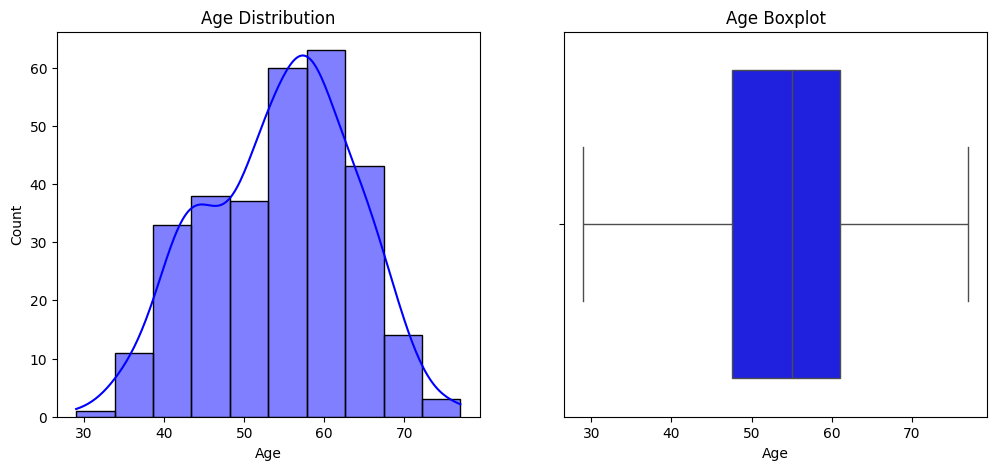

In [53]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(heart_data['age'], bins=10, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=heart_data['age'], color='blue')
plt.xlabel('Age')
plt.title('Age Boxplot')

plt.show()

### **Conclusion from Age Distribution Analysis**  

1. **Histogram (Left Plot - Age Distribution)**  
   - The age distribution appears to be **approximately normal**, with a peak around **55-60 years**.  
   - Most patients are in the **40 to 70-year range**, with very few younger than 35 or older than 75.  
   - The **KDE (Kernel Density Estimation) curve** confirms a smooth bell-shaped pattern.  

2. **Boxplot (Right Plot - Age Boxplot)**  
   - The **median age** is around **55 years** (middle line in the box).  
   - The **interquartile range (IQR)** spans approximately **47 to 61 years**, meaning that 50% of the patients fall within this range.  
   - The presence of **whiskers extending from ~29 to 77 years** suggests the **full age range** of the dataset.  
   - No significant outliers are observed.  

### **Key Insights**  
- Most patients in this dataset are middle-aged or older, suggesting heart disease is more common in these age groups.  
- The data is **fairly symmetrical** without major skewness or extreme outliers.  

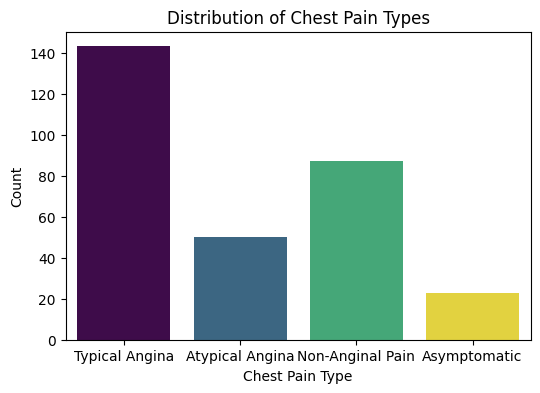

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='cp', data=heart_data, palette='viridis', legend=False)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.xticks(ticks=[0,1,2,3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()

### **Conclusion from Chest Pain Type Distribution**  

1. **Most Common Chest Pain Type**  
   - **Typical Angina** is the most frequently reported chest pain type, with the highest count in the dataset.  
   - This suggests that many patients in the dataset experience **classic symptoms of heart disease**.  

2. **Moderate Presence of Non-Anginal Pain**  
   - A significant number of patients report **Non-Anginal Pain**, which may not be directly related to heart disease.  

3. **Least Common Type - Asymptomatic**  
   - **Asymptomatic cases** are the least common, meaning **most patients in the dataset experience some form of chest pain**.  
   - However, these cases are critical as **silent heart diseases** may go undetected without symptoms.  

### **Key Insights**  
- Chest pain type is an important predictor of heart disease.  
- Typical Angina is the **most reported** type, while Asymptomatic cases are **rare** but significant.  

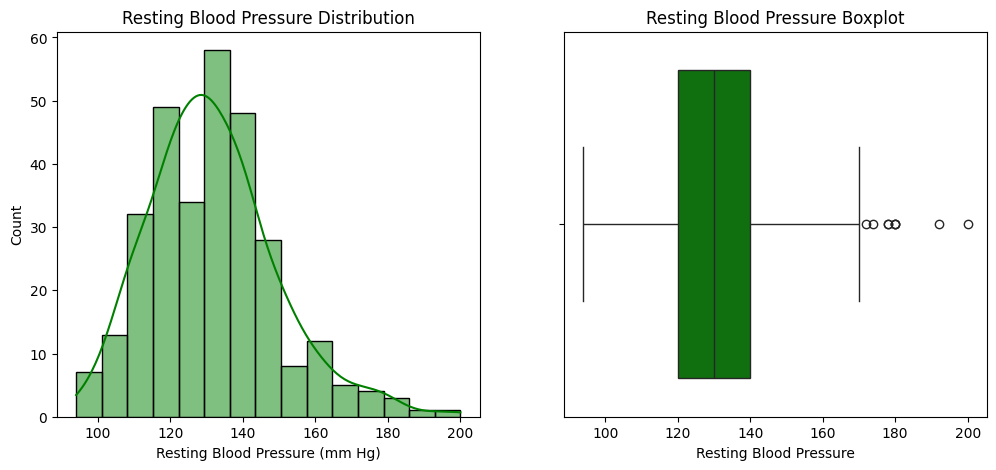

In [55]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(heart_data['trestbps'], bins=15, kde=True, color='green')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.title('Resting Blood Pressure Distribution')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=heart_data['trestbps'], color='green')
plt.xlabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure Boxplot')

plt.show()

### **Conclusion from Resting Blood Pressure Analysis**  

1. **Distribution Insights (Histogram)**  
   - Resting blood pressure values follow a **normal distribution**, with most values clustering between **120-140 mm Hg**.  
   - The peak of the distribution suggests that **hypertension (high blood pressure) is common** among patients.  

2. **Outliers (Boxplot)**  
   - There are **some extreme values** above **170 mm Hg**, indicating cases of **severe hypertension**.  
   - These high blood pressure cases could be linked to a higher risk of heart disease.  

3. **Median & Spread**  
   - The median resting blood pressure is around **130 mm Hg**, which is **above the normal healthy range** (typically **below 120 mm Hg**).  
   - The **interquartile range (IQR)** shows moderate variability in the data.  

### **Key Insights**  
- **Most patients have elevated blood pressure**, with several cases of **hypertension**.  
- **Outliers suggest extreme cases** that might require further medical attention.  
- High blood pressure is a known risk factor for **heart disease**, making this a crucial variable for prediction.  

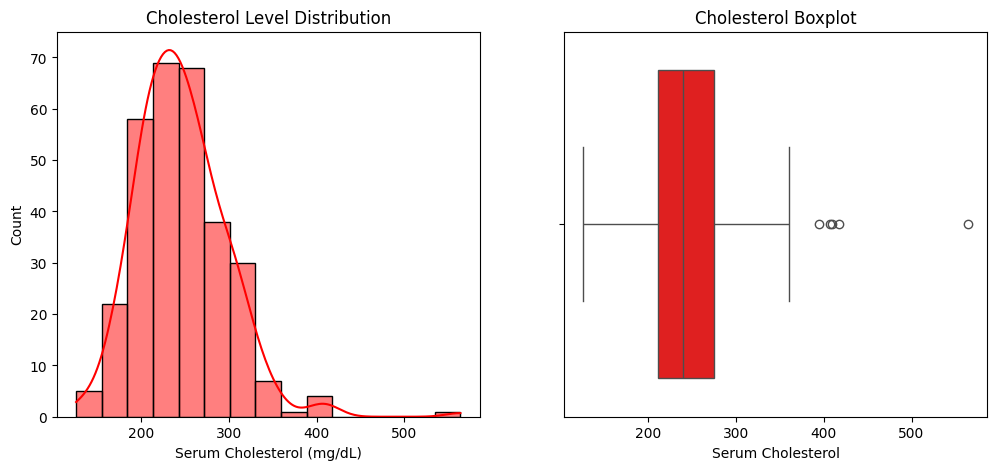

In [56]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(heart_data['chol'], bins=15, kde=True, color='red')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Count')
plt.title('Cholesterol Level Distribution')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=heart_data['chol'], color='red')
plt.xlabel('Serum Cholesterol')
plt.title('Cholesterol Boxplot')

plt.show()

### **Conclusion from Cholesterol Level Analysis**  

1. **Distribution Insights (Histogram)**  
   - The cholesterol levels are **right-skewed**, meaning **some patients have very high cholesterol levels**.  
   - The majority of values fall between **200-300 mg/dL**, which is **borderline high** according to medical guidelines.  
   - There are **a few extreme values above 400 mg/dL**, indicating cases of **severe hypercholesterolemia**.  

2. **Outliers (Boxplot)**  
   - There are **several outliers above 400 mg/dL**, indicating some patients have **dangerously high cholesterol levels**.  
   - The **interquartile range (IQR)** is moderate, showing variation in cholesterol levels among patients.  

3. **Median & Spread**  
   - The **median cholesterol level is above 240 mg/dL**, which is considered **high** and a major risk factor for heart disease.  

### **Key Insights**  
- **High cholesterol levels are common**, with many patients falling in the borderline-high or high-risk category.  
- **Some patients have extreme cholesterol levels**, which could significantly contribute to heart disease.  
- Cholesterol is a crucial variable to monitor as it is **directly linked to cardiovascular health**.  

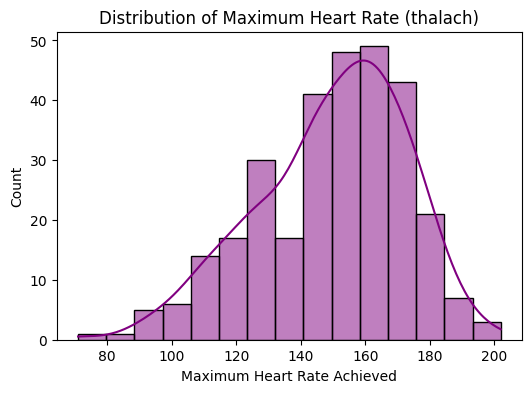

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(heart_data['thalach'], bins=15, kde=True, color='purple')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.title('Distribution of Maximum Heart Rate (thalach)')
plt.show()

### **Conclusion from Maximum Heart Rate (thalach) Analysis**  

1. **Distribution Insights (Histogram)**  
   - The distribution is **slightly right-skewed**, meaning **most patients have a high heart rate, but some have very low values**.  
   - The **majority of values fall between 120-170 bpm**, which is within the expected range for exercise-induced heart rate.  
   - There are **a few patients with very low maximum heart rates (below 100 bpm)**, which might indicate underlying **cardiovascular conditions** or **low physical fitness**.  

2. **Peak and Normal Range**  
   - The **peak density** is around **150-160 bpm**, suggesting that most individuals achieve this range during physical activity.  
   - Values **above 180 bpm are less frequent**, but still present, possibly in younger or fitter individuals.  

### **Key Insights**  
- **Patients with a higher max heart rate are likely to have better cardiovascular fitness.**  
- **Patients with a very low max heart rate (<100 bpm) could have heart conditions** that prevent their heart from responding adequately to exertion.  
- Since **thalach (maximum heart rate) is a key predictor of heart disease**, we should analyze how it correlates with the **target variable (presence of heart disease).**  

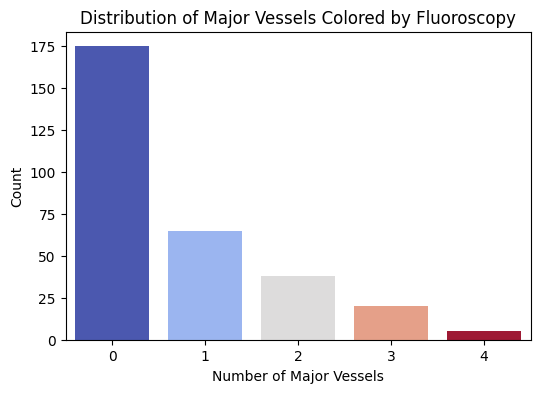

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(x='ca', hue='ca', data=heart_data, palette='coolwarm', legend=False)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.title('Distribution of Major Vessels Colored by Fluoroscopy')
plt.show()

### **Conclusion from Major Vessels (ca) Distribution**  

1. **Observation of Distribution**  
   - **Most patients have 0 major vessels (around 175 cases),** meaning no significant blockage was detected.  
   - The number of patients decreases as the number of affected vessels increases.  
   - Very **few patients have 4 major vessels affected**, indicating severe cardiovascular conditions are less common in the dataset.  

2. **Medical Interpretation**  
   - **Higher values (3 or 4 major vessels affected)** are typically associated with a higher risk of heart disease due to greater arterial blockage.  
   - **Patients with 0 or 1 affected vessel are more likely to be healthy** compared to those with 2 or more affected vessels.  
   - This feature is likely a strong predictor for heart disease and should be analyzed alongside the **target variable** to confirm its impact.  

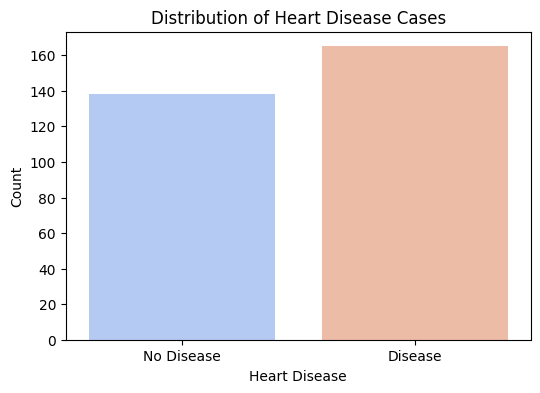

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', hue='target', data=heart_data, palette='coolwarm', legend=False)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Cases')
plt.xticks(ticks=[0,1], labels=['No Disease', 'Disease'])
plt.show()

In [60]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### **Conclusion from Target Variable Distribution**  

- The dataset consists of **303** patients.  
- Out of these, **165 patients (54.5%)** have a **defective heart** (**target = 1**).  
- **138 patients (45.5%)** have a **healthy heart** (**target = 0**).  
- The dataset is fairly balanced, but there are slightly more cases of heart disease than healthy cases.  
- This balance suggests that a classification model trained on this data may not suffer heavily from class imbalance issues, but it’s still important to check model performance on both classes.  

# Bivariate Analysis 

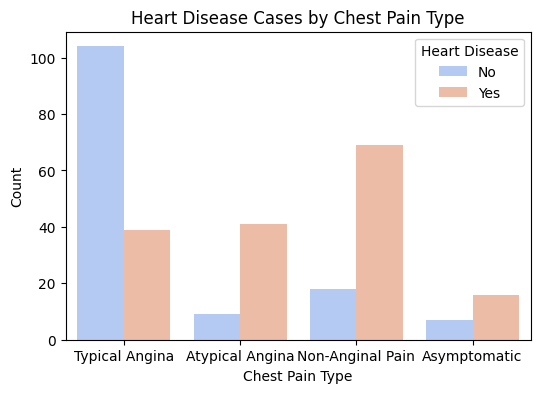

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=heart_data, palette='coolwarm')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Heart Disease Cases by Chest Pain Type')
plt.xticks(ticks=[0,1,2,3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### **Conclusion: Heart Disease Cases by Chest Pain Type**  

- **Typical Angina:** Most cases in this category **do not** have heart disease.  
- **Atypical Angina & Non-Anginal Pain:** A **higher proportion** of patients in these categories have heart disease.  
- **Asymptomatic Cases:** While fewer in number, many patients in this category still have heart disease.  

🔹 **Key Insight:**  
Patients with **non-anginal pain and atypical angina** are at a **higher risk** of heart disease, while **typical angina** is more common in those **without heart disease**.  

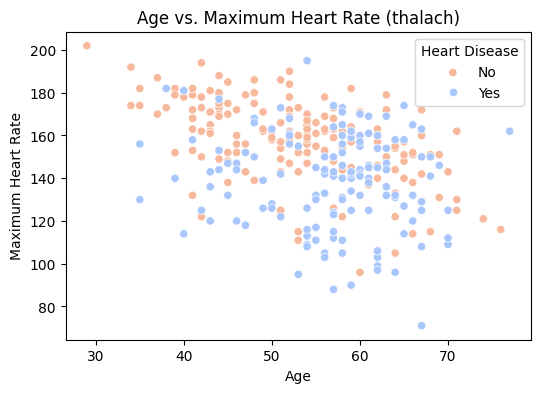

In [62]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=heart_data['age'], y=heart_data['thalach'], hue=heart_data['target'], palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs. Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### **Conclusion: Age vs. Maximum Heart Rate (thalach) & Heart Disease**  

- **Negative Correlation:** As **age increases, maximum heart rate decreases**.  
- **Heart Disease Risk:**  
  - Patients with **heart disease (blue)** tend to have **lower maximum heart rates**.  
  - Patients **without heart disease (orange)** have **higher maximum heart rates** for a given age.  

🔹 **Key insight:**  
Lower **maximum heart rate** in older individuals is **associated with heart disease**. This suggests **heart rate response could be an indicator of heart health**.  

# Multivariate Analysis

<Figure size 600x400 with 0 Axes>

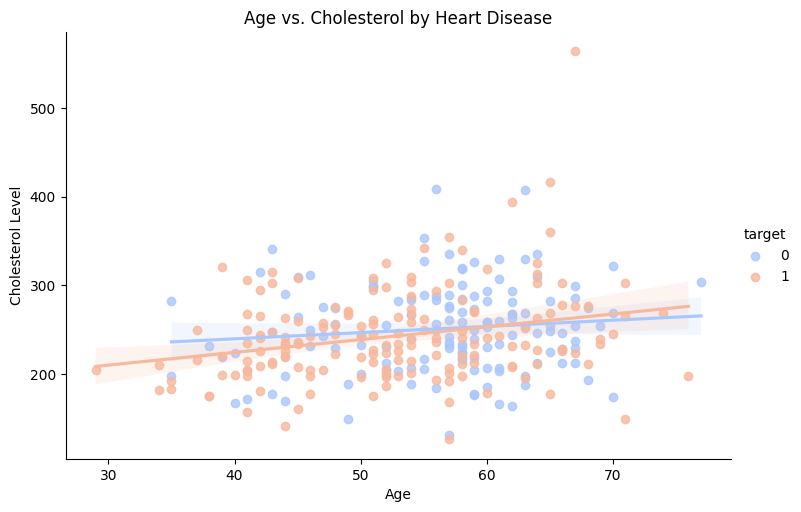

In [63]:
plt.figure(figsize=(6,4))
sns.lmplot(x='age', y='chol', hue='target', data=heart_data, palette='coolwarm', aspect=1.5)
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Age vs. Cholesterol by Heart Disease')
plt.show()

### **Conclusion: Age vs. Cholesterol by Heart Disease**  

- **Slight Positive Correlation:** Cholesterol levels **increase slightly with age**, but the trend is weak.  
- **Heart Disease & Cholesterol:**  
  - Patients with **heart disease (orange dots)** and those without **(blue dots)** show **similar cholesterol distributions** across ages.  
  - No **clear separation** between the two groups, meaning cholesterol alone may not be a **strong predictor** of heart disease.  

🔹 **Key insight:**  
Unlike blood pressure or heart rate, **cholesterol levels do not strongly differentiate heart disease cases** in this dataset. Further analysis (e.g., LDL/HDL ratio) might provide deeper insights.  

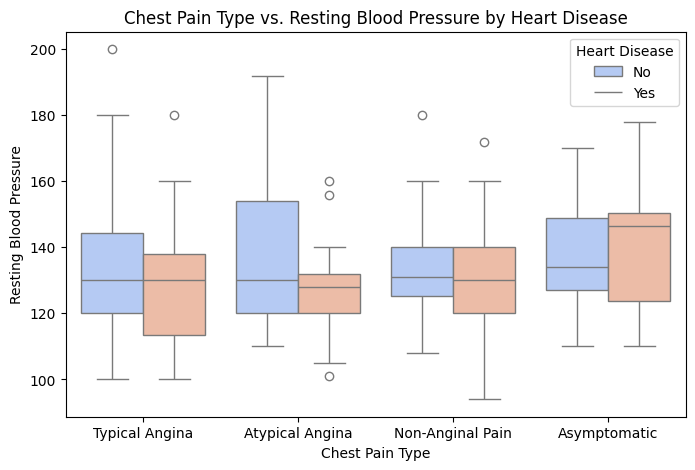

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cp', y='trestbps', hue='target', data=heart_data, palette='coolwarm')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.title('Chest Pain Type vs. Resting Blood Pressure by Heart Disease')
plt.xticks(ticks=[0,1,2,3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### **Conclusion: Chest Pain Type vs. Resting Blood Pressure by Heart Disease**  

1. **Blood Pressure Variability Across Chest Pain Types:**  
   - Patients with **asymptomatic chest pain** tend to have the **highest resting blood pressure**, regardless of heart disease status.  
   - **Atypical angina** exhibits the **widest range** of blood pressure values, especially in patients **without heart disease**.  

2. **Heart Disease and Blood Pressure:**  
   - Across **all chest pain types**, individuals with **heart disease (orange boxes)** generally have a **slightly higher median blood pressure** than those without (blue boxes).  
   - However, **significant overlap** exists between both groups, indicating that **blood pressure alone is not a strong differentiator** of heart disease.  

🔹 **Key insight:**  
- **Asymptomatic individuals** with high blood pressure may require further cardiovascular assessment.  
- **Combining blood pressure with other risk factors (cholesterol, age, ECG results, etc.)** might improve predictive insights.  

Splitting the Features and Target

# Data Preprocessing

### Handling Duplicate Values

In [65]:
duplicate_count = heart_data.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 1


In [66]:
# Remove duplicate rows
heart_data = heart_data.drop_duplicates()

# Verify removal
duplicate_count = heart_data.duplicated().sum()
print(f"Total Duplicate Rows after removal: {duplicate_count}")

Total Duplicate Rows after removal: 0


In [67]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Handling outliers from Resting Blood Pressure Data(trestbps)

In [68]:
Q1 = heart_data['trestbps'].quantile(0.25)  # 25th percentile
Q3 = heart_data['trestbps'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Find outliers
outliers = heart_data[(heart_data['trestbps'] < lower_bound) | (heart_data['trestbps'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Lower Bound: 90.0, Upper Bound: 170.0
Number of outliers: 9


In [69]:
heart_data['trestbps'] = np.where(
    heart_data['trestbps'] > upper_bound, upper_bound,
    np.where(heart_data['trestbps'] < lower_bound, lower_bound,
             heart_data['trestbps'])
)

In [70]:
outliers = heart_data[(heart_data['trestbps'] < lower_bound) | (heart_data['trestbps'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


### Handling outliers from Resting Blood Pressure Data(trestbps)

In [71]:
Q1 = heart_data['chol'].quantile(0.25)  # 25th percentile
Q3 = heart_data['chol'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Find outliers
outliers = heart_data[(heart_data['chol'] < lower_bound) | (heart_data['chol'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Lower Bound: 115.375, Upper Bound: 370.375
Number of outliers: 5


In [72]:
heart_data['chol'] = np.where(
    heart_data['chol'] > upper_bound, upper_bound,
    np.where(heart_data['chol'] < lower_bound, lower_bound,
             heart_data['chol'])
)

In [73]:
# Find outliers
outliers = heart_data[(heart_data['chol'] < lower_bound) | (heart_data['chol'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


### Data Scaling

In [74]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [75]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [76]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = heart_data = scaler.fit_transform(X)

In [77]:
print(X_scaled)

[[ 0.57692308  0.          1.         ... -1.          0.
  -1.        ]
 [-1.42307692  0.          0.5        ... -1.          0.
   0.        ]
 [-1.11538462 -1.          0.         ...  1.          0.
   0.        ]
 ...
 [ 0.96153846  0.         -0.5        ...  0.          2.
   1.        ]
 [ 0.11538462  0.         -0.5        ...  0.          1.
   1.        ]
 [ 0.11538462 -1.          0.         ...  0.          1.
   0.        ]]


# Spliting data

In [78]:
from sklearn.model_selection import train_test_split

# First split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

# Now split the training set further into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, stratify=Y_train, random_state=2)

In [79]:
# Check the sizes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (180, 13)
Validation set size: (61, 13)
Test set size: (61, 13)


# Model Building

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [81]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

# Model Training

In [82]:
for name, md in models.items():
    md.fit(X_train, Y_train)
    ypred = md.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(Y_test,ypred)}")

Logistic Regression with accuracy : 0.8032786885245902
Naive Bayes with accuracy : 0.7704918032786885
Support Vector Machine with accuracy : 0.8360655737704918
K-Nearest Neighbors with accuracy : 0.7868852459016393
Decision Tree with accuracy : 0.7704918032786885
Random Forest with accuracy : 0.8032786885245902
Bagging with accuracy : 0.819672131147541
AdaBoost with accuracy : 0.7868852459016393
Gradient Boosting with accuracy : 0.7704918032786885
Extra Trees with accuracy : 0.7049180327868853


C:\Users\projj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Model Evaluation

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC()  # Initialize the SVM model with default parameters
svm_model.fit(X_train, Y_train)  # Train the model

SVC()

In [84]:
# Step 3: Predict on Test Data
y_pred_svm = svm_model.predict(X_test)

# Step 4: Model Evaluation
svm_accuracy = accuracy_score(Y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_svm))

SVM Test Accuracy: 0.8361

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
[[22  6]
 [ 4 29]]


# Building a Predictive System

In [85]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [87]:
# Sample input data
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Convert input data to a DataFrame 
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

input_df = pd.DataFrame([input_data], columns=columns)  #Assign column names

# Apply RobustScaler transformation
input_scaled = scaler.transform(input_df)

# Make prediction using trained SVM model
prediction = svm_model.predict(input_scaled)

# Output result
if prediction[0] == 1:
    print("The person has heart disease.")
else:
    print("The person does NOT have heart disease.")

The person does NOT have heart disease.


# Saving the trained model

In [44]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, "heart_disease_svm_model.joblib")

# Save the RobustScaler (to ensure correct input scaling in future use)
joblib.dump(scaler, "heart_disease_scaler.joblib")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
